In [1]:
import pandas as pd

df = pd.read_csv("../../Data/UNILAG.csv")
print(df.shape)
print(df.info())
print(df.head())
print(df.describe())
print(df["Admission_Status"].value_counts())
print(df.groupby("Faculty")["Aggregate"].mean())


(10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Faculty           10000 non-null  object 
 1   Department        10000 non-null  object 
 2   UTME_Score        10000 non-null  int64  
 3   Olevel_Grades     10000 non-null  object 
 4   Post_UTME_Score   10000 non-null  int64  
 5   Aggregate         10000 non-null  float64
 6   Cutoff            10000 non-null  float64
 7   Admission_Status  10000 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB
None
                  Faculty          Department  UTME_Score       Olevel_Grades  \
0       Clinical Sciences       Physiotherapy         325  B2, B2, C6, B2, B3   
1  Basic Medical Sciences        Pharmacology         184  C6, A1, B2, C5, B2   
2       Clinical Sciences             Nursing         243  B2, C4, B3, B2, B3   
3         Dental Sc

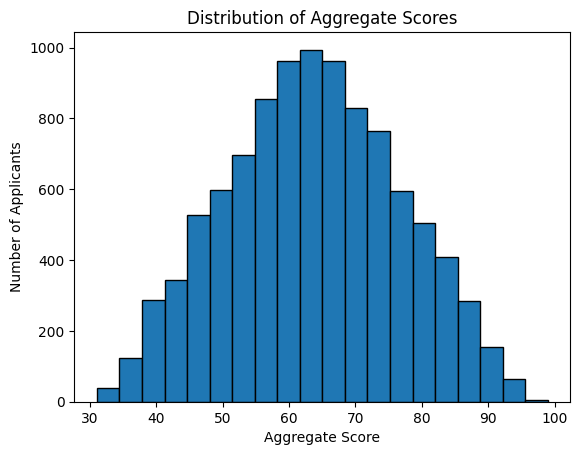

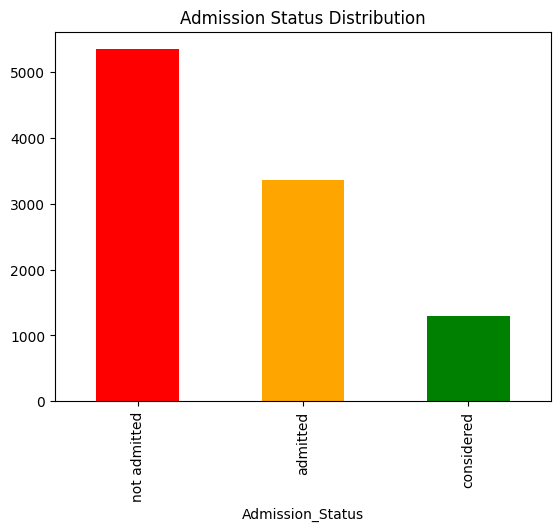

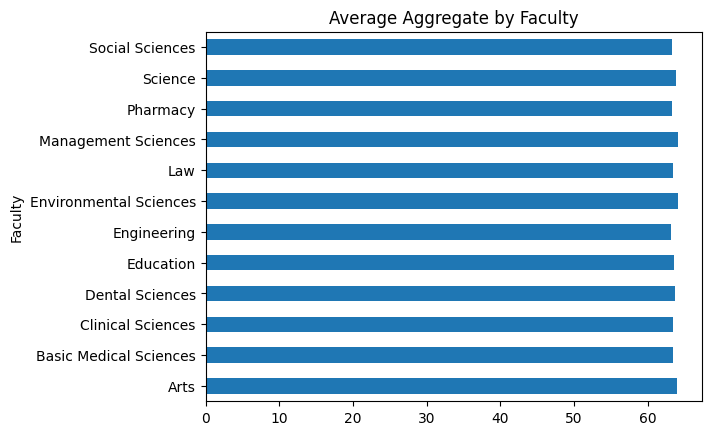

Faculty
Environmental Sciences    0.470387
Science                   0.464634
Education                 0.459427
Engineering               0.448190
Arts                      0.387856
Management Sciences       0.364198
Social Sciences           0.335697
Law                       0.319444
Basic Medical Sciences    0.242054
Clinical Sciences         0.207053
Pharmacy                  0.172289
Dental Sciences           0.168109
dtype: float64
Department
Education Economics     0.945946
Education Yoruba        0.921053
Business Education      0.913043
Building                0.904192
Zoology                 0.892308
                          ...   
Radiography             0.216590
Mass Communication      0.208633
Pharmacy                0.173494
Dentistry               0.168109
Medicine and Surgery    0.139130
Name: meets_cutoff, Length: 84, dtype: float64


In [2]:
import matplotlib.pyplot as plt

# Histogram of aggregates
plt.hist(df["Aggregate"], bins=20, edgecolor="black")
plt.xlabel("Aggregate Score")
plt.ylabel("Number of Applicants")
plt.title("Distribution of Aggregate Scores")
plt.show()

# Admission status counts
df["Admission_Status"].value_counts().plot(kind="bar", color=["red","orange","green"])
plt.title("Admission Status Distribution")
plt.show()

# Average aggregate by faculty
df.groupby("Faculty")["Aggregate"].mean().plot(kind="barh")
plt.title("Average Aggregate by Faculty")
plt.show()

# Admission rate per faculty
admission_rate = df[df["Admission_Status"]=="admitted"].groupby("Faculty").size() / df.groupby("Faculty").size()
print(admission_rate.sort_values(ascending=False))

df["meets_cutoff"] = df["Aggregate"] >= df["Cutoff"]
print(df.groupby("Department")["meets_cutoff"].mean().sort_values(ascending=False))
